In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt


In [169]:
df1 = pd.read_csv("C:/Users/akaks/Downloads/horses2.csv")

In [2]:
df = pd.read_csv("C:/Users/akaks/Downloads/horses2.csv")

In [6]:
df.head()

,Column1,racenumber,racename,racetitle,racedistance,place,horsename,prizemoney,row,trainer,...,countld3,countld4,countfront1,countfront2,countfront3,countfront4,countofdeath,frontrow,secondrow,numbertrainer
0,0,1,ALBANY AUTOS 4YO+ MS PACE (SKY2),"$7,500 4YO and older. Maiden (HWOE = $0). RBD....",2265,10,JUST A SMILE,7500,3,Nathan Dymock,...,0,0,1,1,2,0,0,11,3,1
1,1,4,SOS OFFICE 3YO+ MS PACE (SKY1),"$7,500 3YO and older. L6/7 NE HWOE $25,000+. P...",2265,5,ALL THE BELLS,7500,3,Barry Howlett,...,1,0,2,4,5,0,0,20,7,2
2,2,6,ALBANY SCAFFOLD HIRE 4YO+ MS PACE (SKY1),"$7,500 4YO and older. L7/8 (CL9) CONDITIONED. ...",2265,8,ADDA COURAGE,7500,1,Damond Briggs,...,0,0,9,10,5,3,1,41,11,1
3,3,1,GARRARDS HORSE & HOUND BAND 5 PACE,"$14,060 Band 5. RBD. Mobile",1660,1,FRANCO LANDRY,14060,6,Jack Butler,...,0,0,4,11,8,5,0,36,1,1
4,4,2,TAB VENUE MODE VETERANS PACE,"$8,640 NR 70 to 99. PBD/L6$. Mobile",2138,7,ITZ BETTOR TO WIN,8640,1,Mark Dux,...,3,0,2,5,5,7,1,37,9,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144917 entries, 0 to 144916
Columns: 140 entries, Column1 to numbertrainer
dtypes: float64(56), int64(65), object(19)
memory usage: 154.8+ MB


### Null values

In [8]:
null = df.isnull().sum().to_frame('Null')

In [9]:
cols = null[null['Null']==144917].index

In [10]:
#  42 columns with all the null values

In [11]:
df.drop(cols,axis=1,inplace=True)

In [12]:
df.shape

(144917, 98)

In [13]:
corr = df.corr()['place'].to_frame('Correlation')

In [14]:
pd.set_option('display.max_columns',None)

In [1]:
# for i in df.columns:    
#     print(i, df[i].nunique())

In [16]:
cols_to_drop = ['Column1','racename','racetitle','horsename','stewardscomments','colour','daycalender','firststarter',
                'stewardsfull']

In [17]:
df.drop(cols_to_drop,axis=1,inplace=True)

In [18]:
a = corr[(corr.Correlation<0.1) & (corr.Correlation>-0.1)].index

In [19]:
for i in a:
    if i not in cols_to_drop:
        cols_to_drop.append(i)

In [20]:
cols_to_drop.remove('racenumber')

In [21]:
cols_to_drop.remove('prizemoney')

In [22]:
cols_to_drop.remove('horseid')

In [23]:
cols_to_drop.remove('morningrace')

In [24]:
for i in cols_to_drop:
    if i in df.columns:
        df.drop(i,axis=1,inplace=True)

In [25]:
zero_index = df[df.place==0].index

In [26]:
df.drop(zero_index,inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [28]:
df.drop(['trainer','driver','sire','trainerlaststart','driverlaststart','tracklaststart','tracknamelaststart'],axis=1,inplace=True)

In [29]:
sex_df = pd.get_dummies(df['sex'],drop_first=True)
df = df.join(sex_df)
df.drop('sex',axis=1,inplace=True)

In [30]:
df

,racenumber,place,prizemoney,margin,startingodds,venue,placer,horseid,age,winner,lifetimewinpercent,lifetimeplacepercent,recentplacepercent,recentwinpercent,recentplacings,recentseconds,recentwins,class,laststart,start2,marginwinner,bestwinningmile,prizemoneylaststart,racetime,morningrace,timelastrace,startingprice1,avestake,aveplace,FILLY,GELDING,HORSE,MARE,RIG
0,1,10,7500,103.8,91.00,Albany,0,796616,6,0,0.000000,0.214286,0.192308,0.038462,5,3,1,50,8,10,0.0,0,100,6:18pm,0,7:45pm,52.70,206.500000,6.428571,0,1,0,0,0
1,4,5,7500,24.2,16.00,Albany,0,802153,5,0,0.185185,0.444444,0.500000,0.166667,6,2,2,75,8,2,0.0,0,263,7:55pm,0,3:01pm,2.75,1164.481481,3.777778,0,0,0,1,0
2,6,8,7500,96.2,61.00,Albany,0,783553,8,0,0.153846,0.288462,0.000000,0.000000,0,0,0,50,0,2,0.0,0,0,8:50pm,0,0,0.00,713.423077,5.288462,0,1,0,0,0
3,1,1,14060,0.0,6.50,Albion Park,1,812938,6,1,0.270270,0.540541,0.200000,0.100000,2,1,1,87,1,1,1.7,01:54.7,7818,5:38pm,1,7:30pm,4.80,2454.162162,3.837838,0,0,1,0,0
4,2,7,8640,3.9,9.00,Albion Park,0,786217,9,0,0.130435,0.347826,0.000000,0.000000,0,0,0,83,2,4,0.0,01:58.2,120,6:07pm,0,7:40pm,71.00,1932.260870,4.717391,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144912,6,2,6510,3.2,1.75,Albion Park,1,797335,6,0,0.217391,0.500000,0.357143,0.000000,5,3,0,80,1,1,0.0,0,1080,2:53pm,1,8:20pm,16.00,1309.347826,4.413043,0,1,0,0,0
144913,6,3,6510,4.0,8.00,Albion Park,1,799025,5,0,0.160714,0.553571,0.321429,0.214286,9,2,6,81,2,6,0.0,02:03.3,570,2:53pm,1,4:53pm,3.20,1264.071429,4.214286,0,0,1,0,0
144914,6,4,6510,5.1,34.00,Albion Park,0,782503,8,0,0.137255,0.313725,0.380952,0.142857,8,1,3,65,1,3,0.0,02:01.4,399,2:53pm,1,4:23pm,3.60,781.529412,4.980392,0,1,0,0,0
144915,6,5,6510,11.2,61.00,Albion Park,0,804021,4,0,0.189189,0.405405,0.272727,0.045455,6,3,1,66,5,5,0.0,0,286,2:53pm,1,2:53pm,4.20,1014.648649,4.162162,0,0,0,1,0


In [31]:
venue = df[df['place'] == 1][['venue', 'place']].groupby('venue')['place'].count().sort_values().reset_index()['venue']

In [32]:
venue_index = []
for index,value in enumerate(venue):
    venue_index.append([index,value])

In [33]:
venue = []
for i in df.venue:
    for j in venue_index:
        if i in j[1]:
            i = str(j[0])
            venue.append(i)

In [34]:
df['venue'] = venue

In [38]:
df.drop('timelastrace',axis=1,inplace=True)

In [39]:
df.drop(['racetime','horseid'],axis=1,inplace=True)

In [40]:
df.drop('bestwinningmile',axis=1,inplace=True)

In [41]:
X = df.drop('place',axis=1)

In [42]:
Y = df['place']

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [44]:
Xnew

,racenumber,prizemoney,margin,startingodds,venue,placer,age,winner,lifetimewinpercent,lifetimeplacepercent,recentplacepercent,recentwinpercent,recentplacings,recentseconds,recentwins,class,laststart,start2,marginwinner,prizemoneylaststart,morningrace,startingprice1,avestake,aveplace,FILLY,GELDING,HORSE,MARE,RIG
0,-1.493293,-0.140549,2.586301,1.829209,-0.980698,-0.718687,0.189383,-0.357837,-0.998425,-0.821754,-0.627293,-0.562352,-0.112117,0.610927,-0.405284,-0.352150,1.168813,1.897948,-0.215952,-0.277559,-0.836555,0.817366,-0.587343,1.368664,-0.266762,0.777326,-0.157622,-0.608569,-0.030488
1,-0.343618,-0.140549,0.124559,-0.341797,-0.980698,-0.718687,-0.291365,-0.357837,0.382406,0.360839,0.861115,0.491118,0.124371,0.077878,0.164416,1.066788,1.168813,-0.989305,-0.215952,-0.226697,-0.836555,-0.674115,0.061336,-0.712871,-0.266762,-1.286461,-0.157622,1.643200,-0.030488
2,0.422832,-0.140549,2.351260,0.960807,-0.980698,-0.718687,1.150880,-0.357837,0.148727,-0.440627,-1.557548,-0.878393,-1.294556,-0.988221,-0.974985,-0.352150,-1.582470,-0.989305,-0.215952,-0.308762,-0.836555,-0.756229,-0.244090,0.473393,-0.266762,0.777326,-0.157622,-0.608569,-0.030488
3,-1.493293,0.245704,-0.623860,-0.616791,0.886398,1.391426,0.189383,2.794572,1.016842,0.854596,-0.590083,-0.056686,-0.821580,-0.455171,-0.405284,1.747878,-1.238559,-1.350212,0.514070,2.130709,1.195378,-0.612903,0.934617,-0.665709,-0.266762,-1.286461,6.344300,-0.608569,-0.030488
4,-1.110068,-0.073426,-0.503247,-0.544424,0.886398,-0.718687,1.631628,-0.357837,-0.025840,-0.135602,-1.557548,-0.878393,-1.294556,-0.988221,-0.974985,1.520848,-0.894649,-0.267492,-0.215952,-0.271318,-0.836555,1.363794,0.581222,0.024960,-0.266762,0.777326,-0.157622,-0.608569,-0.030488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144288,0.422832,-0.198840,-0.524896,-0.754288,0.886398,1.391426,0.189383,-0.357837,0.622551,0.646292,0.170069,-0.878393,-0.112117,0.610927,-0.974985,1.350576,-1.238559,-1.350212,-0.215952,0.028233,1.195378,-0.278477,0.159429,-0.214029,-0.266762,0.777326,-0.157622,-0.608569,-0.030488
144289,0.422832,-0.198840,-0.500155,-0.573371,0.886398,1.391426,-0.291365,-0.357837,0.199939,0.921551,-0.002693,0.882407,0.833834,0.077878,2.443216,1.407333,-0.894649,0.454322,-0.215952,-0.130903,1.195378,-0.660679,0.128771,-0.370103,-0.266762,-1.286461,6.344300,-0.608569,-0.030488
144290,0.422832,-0.198840,-0.466136,0.179244,0.886398,-0.718687,1.150880,-0.357837,0.025015,-0.310817,0.285243,0.295474,0.597347,-0.455171,0.734116,0.499213,-1.238559,-0.628398,-0.215952,-0.184261,1.195378,-0.648735,-0.197973,0.231481,-0.266762,0.777326,-0.157622,-0.608569,-0.030488
144291,0.422832,-0.198840,-0.277485,0.960807,0.886398,-0.718687,-0.772113,-0.357837,0.412262,0.160250,-0.238277,-0.504890,0.124371,0.610927,-0.405284,0.555970,0.137082,0.093415,-0.215952,-0.219521,1.195378,-0.630819,-0.040121,-0.411033,-0.266762,-1.286461,-0.157622,1.643200,-0.030488


In [45]:
df.shape

(144293, 30)

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [48]:
pred = dtc.predict(xtest)

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [50]:
accuracy_score(pred,ytest)

0.7286461762361828

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy')

In [52]:
pred_rfc = rfc.predict(xtest)

In [53]:
accuracy_score(pred_rfc,ytest)

0.7368585190062026

In [54]:
rfc.feature_importances_

array([1.84770693e-02, 6.30825052e-02, 1.08709229e-01, 3.90161185e-02,
       2.47911983e-02, 1.64580003e-01, 1.51408138e-02, 4.11948202e-02,
       2.44206338e-02, 2.57305320e-02, 2.26728625e-02, 1.66925654e-02,
       1.57248929e-02, 1.20399798e-02, 9.05364527e-03, 2.42043979e-02,
       1.96939668e-02, 1.87697301e-02, 4.29867311e-02, 1.90550365e-01,
       5.83383923e-03, 2.74294069e-02, 3.05303985e-02, 2.79228261e-02,
       1.44394002e-03, 4.65105490e-03, 6.23465909e-04, 4.00497796e-03,
       2.80303898e-05])

In [55]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

<BarContainer object of 29 artists>

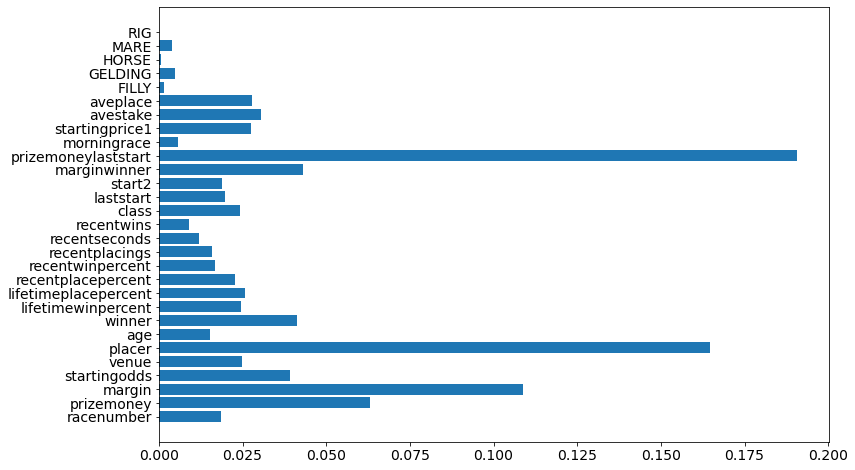

In [56]:
plt.barh(Xnew.columns,rfc.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

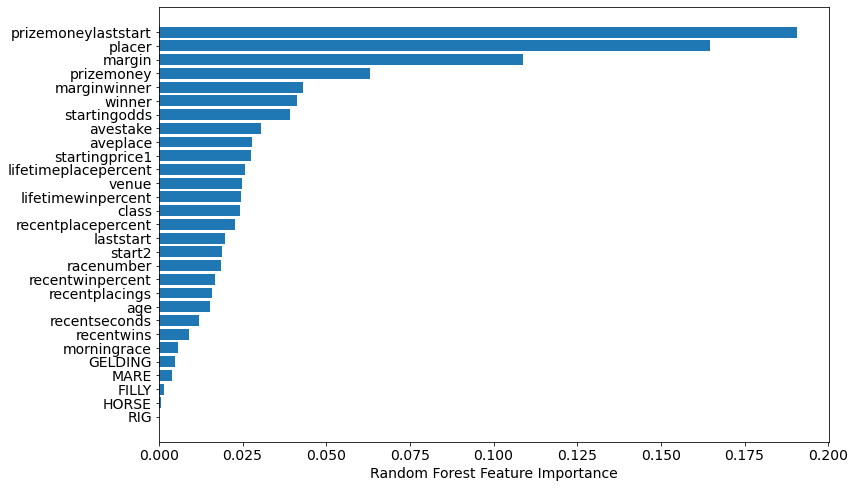

In [57]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(Xnew.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [58]:
df

,racenumber,place,prizemoney,margin,startingodds,venue,placer,age,winner,lifetimewinpercent,lifetimeplacepercent,recentplacepercent,recentwinpercent,recentplacings,recentseconds,recentwins,class,laststart,start2,marginwinner,prizemoneylaststart,morningrace,startingprice1,avestake,aveplace,FILLY,GELDING,HORSE,MARE,RIG
0,1,10,7500,103.8,91.00,41,0,6,0,0.000000,0.214286,0.192308,0.038462,5,3,1,50,8,10,0.0,100,0,52.70,206.500000,6.428571,0,1,0,0,0
1,4,5,7500,24.2,16.00,41,0,5,0,0.185185,0.444444,0.500000,0.166667,6,2,2,75,8,2,0.0,263,0,2.75,1164.481481,3.777778,0,0,0,1,0
2,6,8,7500,96.2,61.00,41,0,8,0,0.153846,0.288462,0.000000,0.000000,0,0,0,50,0,2,0.0,0,0,0.00,713.423077,5.288462,0,1,0,0,0
3,1,1,14060,0.0,6.50,84,1,6,1,0.270270,0.540541,0.200000,0.100000,2,1,1,87,1,1,1.7,7818,1,4.80,2454.162162,3.837838,0,0,1,0,0
4,2,7,8640,3.9,9.00,84,0,9,0,0.130435,0.347826,0.000000,0.000000,0,0,0,83,2,4,0.0,120,0,71.00,1932.260870,4.717391,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144912,6,2,6510,3.2,1.75,84,1,6,0,0.217391,0.500000,0.357143,0.000000,5,3,0,80,1,1,0.0,1080,1,16.00,1309.347826,4.413043,0,1,0,0,0
144913,6,3,6510,4.0,8.00,84,1,5,0,0.160714,0.553571,0.321429,0.214286,9,2,6,81,2,6,0.0,570,1,3.20,1264.071429,4.214286,0,0,1,0,0
144914,6,4,6510,5.1,34.00,84,0,8,0,0.137255,0.313725,0.380952,0.142857,8,1,3,65,1,3,0.0,399,1,3.60,781.529412,4.980392,0,1,0,0,0
144915,6,5,6510,11.2,61.00,84,0,4,0,0.189189,0.405405,0.272727,0.045455,6,3,1,66,5,5,0.0,286,1,4.20,1014.648649,4.162162,0,0,0,1,0


In [59]:
for i in X.columns:
    print(i)

racenumber
prizemoney
margin
startingodds
venue
placer
age
winner
lifetimewinpercent
lifetimeplacepercent
recentplacepercent
recentwinpercent
recentplacings
recentseconds
recentwins
class
laststart
start2
marginwinner
prizemoneylaststart
morningrace
startingprice1
avestake
aveplace
FILLY
GELDING
HORSE
MARE
RIG


In [60]:
tr_pred = rfc.predict(xtrain)

In [61]:
accuracy_score(ytrain,tr_pred)

1.0

In [62]:
ts_pred = rfc.predict(xtest)

In [63]:
accuracy_score(ytest,ts_pred)

0.7368585190062026

In [64]:
rfc.predict_proba(xtest)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.89, 0.11, ..., 0.  , 0.  , 0.  ],
       ...,
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.06, 0.93, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ]])

In [65]:
proba = []
for i in rfc.predict_proba(xtest):
    proba.append(max(i))

In [66]:
pd.DataFrame(confusion_matrix(ytest,pred_rfc))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3288,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,3196,102,0,0,0,0,0,0,0,0,0,0,0
2,0,112,3144,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3083,70,39,14,8,8,1,0,0,0,0
4,0,0,0,159,2969,92,40,28,19,0,0,0,0,0
5,0,0,0,38,110,1978,580,318,137,26,1,0,0,0
6,0,0,0,39,80,953,1207,354,211,50,5,2,0,0
7,0,0,0,16,46,658,530,1051,289,71,3,1,0,0
8,0,0,0,7,20,358,353,375,784,96,3,2,0,0
9,0,0,0,2,16,114,183,227,217,418,4,6,0,0


In [67]:
pd.DataFrame({
"actual":ytest,
"prediction":pred_rfc,
"probability":proba}).to_csv('predict.csv',index=False)

In [68]:
pd.DataFrame({
"actual":ytest,
"prediction":pred_rfc,
"probability":proba})

,actual,prediction,probability
84410,9,8,0.34
96527,5,5,0.91
131965,2,2,0.89
139829,11,11,0.58
115583,6,7,0.32
...,...,...,...
30114,1,1,1.00
93270,9,9,0.73
89780,1,1,1.00
89175,3,3,0.93
